# ***Linear Regression - Plot the loss $y-\hat{y}$***

---

The regression model, plotting the loss with respect to the training epochs required for the model to converge.

In [ ]:
import pandas as pd     # import the needed packages.
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.linear_model import SGDClassifier, SGDRegressor
import sys
from io import StringIO

In [ ]:
day = "/content/day.csv"      # import day.csv
df = pd.read_csv(day)
print(df)       # print the dataset.

     instant      dteday  season  yr  ...  windspeed  casual  registered   cnt
0          1  2011-01-01       1   0  ...   0.160446     331         654   985
1          2  2011-01-02       1   0  ...   0.248539     131         670   801
2          3  2011-01-03       1   0  ...   0.248309     120        1229  1349
3          4  2011-01-04       1   0  ...   0.160296     108        1454  1562
4          5  2011-01-05       1   0  ...   0.186900      82        1518  1600
..       ...         ...     ...  ..  ...        ...     ...         ...   ...
726      727  2012-12-27       1   1  ...   0.350133     247        1867  2114
727      728  2012-12-28       1   1  ...   0.155471     644        2451  3095
728      729  2012-12-29       1   1  ...   0.124383     159        1182  1341
729      730  2012-12-30       1   1  ...   0.350754     364        1432  1796
730      731  2012-12-31       1   1  ...   0.154846     439        2290  2729

[731 rows x 16 columns]


In [ ]:
# feature_cols = ['mnth', 'holiday', 'weekday', 'workingday','weathersit','temp', 'hum', 'windspeed']
X = df[['temp']]     # select prominent feature.
y = df['cnt']      # target variable.
print(X.head())
print(y.head())

       temp
0  0.344167
1  0.363478
2  0.196364
3  0.200000
4  0.226957
0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64


In [ ]:
old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()

-- Epoch 1
Norm: 339.00, NNZs: 1, Bias: 985.000000, T: 1, Avg. loss: 485112.500000
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 298.85, NNZs: 1, Bias: 868.325840, T: 1, Avg. loss: 6806.429809
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 303.61, NNZs: 1, Bias: 882.146002, T: 1, Avg. loss: 95.498440
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 303.04, NNZs: 1, Bias: 880.508991, T: 1, Avg. loss: 1.339902
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 303.11, NNZs: 1, Bias: 880.702897, T: 1, Avg. loss: 0.018800
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 303.10, NNZs: 1, Bias: 880.679928, T: 1, Avg. loss: 0.000264
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 303.10, NNZs: 1, Bias: 880.682649, T: 1, Avg. loss: 0.000004
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 303.10, NNZs: 1, Bias: 880.682327, T: 1, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 303.10, NNZs: 1, Bias: 880.682365, T: 1, Avg. loss: 0.000000
Total tra

In [ ]:
n = 1 ;             # number of instances.
fX = X[:n].values
fy = y[:n].values

In [ ]:
learning_rate = 1

sgd = SGDRegressor(loss="squared_loss", learning_rate='constant', eta0=learning_rate, penalty=None, max_iter=1,
                   average=False, random_state=2018, verbose=1)

In [ ]:
p_sum = [] ;      # this holds the sum of y-y_hat.
epochs = 15 ;     # number of epochs.

for epoch in range(epochs):
    model = sgd.partial_fit(fX, fy)
    y = model.predict(fX)
    p_sum.append(np.sum(fy-y))

In [ ]:
sys.stdout = old_stdout
loss_history = mystdout.getvalue()
print(loss_history)
loss_list = []
for line in loss_history.split('\n'):
    if(len(line.split("loss: ")) == 1):
        continue
    loss_list.append(float(line.split("loss: ")[-1]))

In [ ]:
print(model.coef_)

[303.10180604]


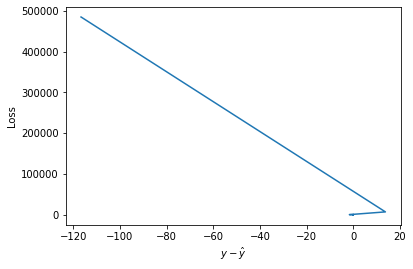

In [ ]:
plt.figure()          # print loss with respect to y-yhat.
plt.plot(p_sum, loss_list)
plt.xlabel("$y-\hat{y}$")
plt.ylabel("Loss")
plt.show()